In [972]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [973]:
#đọc file CSV
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [974]:
#Hiển thị 5 dòng đầu tiên trong data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [975]:
# Hiển thị 5 dòng cuối cùng
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [976]:

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [977]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [978]:
#Vì có những cột Tenure(số tháng khách hàng đã ở lại) == 0 nên sẽ phải lọc các bản ghi đó ra
data[data.tenure != 0].info()
# Có 11 bản ghi
data = data[data.tenure != 0]

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [979]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [980]:
# Chuyển đỏi kiểu dữ liệu cho TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [981]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [982]:
nan_df = data[data.isna().any(axis=1)]
display(nan_df.head())
print('Tổng số dòng không có dữ liệu:', nan_df.shape[0])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Tổng số dòng không có dữ liệu: 0


In [983]:
# Xóa cột thông tin không cần thiết
# Xóa customer ID vì nó là giá trị riêng của từng khách hàng không làm ảnh hưởng tập dữ liệu
data = data.drop('customerID', axis=1)

# Thông tin của từng cột

In [985]:
labels = data.columns[1:]
print(labels)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [986]:
for i in labels:
    print(data[i].value_counts(),'\n');

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64 

Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64 

PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype:

# Việt hóa các dữ liệu trong bảng data

In [988]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [989]:
data.rename(columns={
    'gender':'Giới tính',
    
    'SeniorCitizen':'Người già',
    
    'Partner': 'Đối tác',
    
    'Dependents':'Phụ thuộc',
    
    'tenure':'Số tháng gắn bó',
    
    'PhoneService':'Dịch vụ điện thoại',
    
    'MultipleLines': 'Đa luồng',
    
    'InternetService':'Dịch vụ internet',
    
    'OnlineSecurity':'Bảo mật trực tuyến',
    
    'OnlineBackup':'Sao lưu trực tuyến',
    
    'DeviceProtection': 'Bảo vệ thiết bị',
    
    'TechSupport':'Hỗ trợ kỹ thuật',
    
    'StreamingTV':'TV trực tuyến',
    
    'StreamingMovies':'Phim trực tuyến',
    
    'Contract': 'Loại hợp đồng',
    
    'PaperlessBilling':'Thanh toán điện tử',

    'PaymentMethod':'Phương thức thanh toán',
    
    'MonthlyCharges':'Phí hàng tháng',
    
    'TotalCharges': 'Tổng phí',
    
    'Churn':'Tình trạng khách hàng'

}, inplace=True)

In [990]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Giới tính               7032 non-null   object 
 1   Người già               7032 non-null   int64  
 2   Đối tác                 7032 non-null   object 
 3   Phụ thuộc               7032 non-null   object 
 4   Số tháng gắn bó         7032 non-null   int64  
 5   Dịch vụ điện thoại      7032 non-null   object 
 6   Đa luồng                7032 non-null   object 
 7   Dịch vụ internet        7032 non-null   object 
 8   Bảo mật trực tuyến      7032 non-null   object 
 9   Sao lưu trực tuyến      7032 non-null   object 
 10  Bảo vệ thiết bị         7032 non-null   object 
 11  Hỗ trợ kỹ thuật         7032 non-null   object 
 12  TV trực tuyến           7032 non-null   object 
 13  Phim trực tuyến         7032 non-null   object 
 14  Loại hợp đồng           7032 non-null   objec

In [991]:
data['Giới tính'] = data['Giới tính'].replace({
    'Male' : 'Nam' ,
    'Female' : 'Nữ' ,
})

In [992]:
data['Người già'] = data['Người già'].replace({
    0 : 'Trẻ' ,
    1 : 'Già' 
})

In [993]:
data['Phụ thuộc'] = data['Phụ thuộc'].replace({
    'Yes' : 'Có phụ thuộc' ,
    'No' : 'Không có phụ thuộc' ,
})

In [994]:
data['Đối tác'] = data['Đối tác'].replace({
    'Yes' : 'Là đối tác' ,
    'No' : 'Không là đối tác' ,
})

In [995]:
data['Sao lưu trực tuyến'] = data['Bảo mật trực tuyến'] = data['Bảo vệ thiết bị'] = data['Hỗ trợ kỹ thuật'] = data['Phim trực tuyến'] = data['TV trực tuyến'] = data['TV trực tuyến'].replace({
    'Yes': 'Sử dụng dịch vụ',
    'No' : 'Không sử dụng dịch vụ',
    'No internet service' : 'Không sử dụng dịch vụ internet'
})

In [996]:
data['Dịch vụ điện thoại'] = data['Dịch vụ điện thoại'].replace({
    'Yes': 'Sử dụng dịch vụ',
    'No' : 'Không sử dụng dịch vụ'
})
data['Đa luồng'] = data['Đa luồng'].replace({
    'Yes': 'Sử dụng dịch vụ',
    'No' : 'Không sử dụng dịch vụ',
    'No phone service' : 'Không sử dụng dịch vụ điện thoại'
})
# data[data.customerID == '7590-VHVEG']

In [997]:
data['Loại hợp đồng'] = data['Loại hợp đồng'].replace({
    'Month-to-month': 'Từng tháng',
    'Two year' : 'Hai năm',
    'One year' : 'Từng năm'
})

In [998]:
data['Phương thức thanh toán'] = data['Phương thức thanh toán'].replace({
    'Electronic check': 'Hóa đơn điện tử',
    'Mailed check' : 'Gửi qua bưu điện',
    'Bank transfer (automatic)' : 'Tự động qua giao dịch ngân hàng',
    'Credit card (automatic)' : 'Tự động qua thẻ tin dụng'
})

In [999]:
data['Thanh toán điện tử'] = data['Thanh toán điện tử'].replace({
    'Yes': 'Sử dụng hóa đơn điện tử',
    'No' : 'Không sử dụng hóa đơn điện tử'
})

In [1000]:
data['Tình trạng khách hàng'] = data['Tình trạng khách hàng'].replace({
    'Yes': 'Đã rời bỏ',
    'No' : 'Ở lại'
})

In [1001]:
data

,Giới tính,Người già,Đối tác,Phụ thuộc,Số tháng gắn bó,Dịch vụ điện thoại,Đa luồng,Dịch vụ internet,Bảo mật trực tuyến,Sao lưu trực tuyến,Bảo vệ thiết bị,Hỗ trợ kỹ thuật,TV trực tuyến,Phim trực tuyến,Loại hợp đồng,Thanh toán điện tử,Phương thức thanh toán,Phí hàng tháng,Tổng phí,Tình trạng khách hàng
0,Nữ,Trẻ,Là đối tác,Không có phụ thuộc,1,Không sử dụng dịch vụ,Không sử dụng dịch vụ điện thoại,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Từng tháng,Sử dụng hóa đơn điện tử,Hóa đơn điện tử,29.85,29.85,Ở lại
1,Nam,Trẻ,Không là đối tác,Không có phụ thuộc,34,Sử dụng dịch vụ,Không sử dụng dịch vụ,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Từng năm,Không sử dụng hóa đơn điện tử,Gửi qua bưu điện,56.95,1889.50,Ở lại
2,Nam,Trẻ,Không là đối tác,Không có phụ thuộc,2,Sử dụng dịch vụ,Không sử dụng dịch vụ,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Từng tháng,Sử dụng hóa đơn điện tử,Gửi qua bưu điện,53.85,108.15,Đã rời bỏ
3,Nam,Trẻ,Không là đối tác,Không có phụ thuộc,45,Không sử dụng dịch vụ,Không sử dụng dịch vụ điện thoại,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Từng năm,Không sử dụng hóa đơn điện tử,Tự động qua giao dịch ngân hàng,42.30,1840.75,Ở lại
4,Nữ,Trẻ,Không là đối tác,Không có phụ thuộc,2,Sử dụng dịch vụ,Không sử dụng dịch vụ,Fiber optic,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Từng tháng,Sử dụng hóa đơn điện tử,Hóa đơn điện tử,70.70,151.65,Đã rời bỏ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Nam,Trẻ,Là đối tác,Có phụ thuộc,24,Sử dụng dịch vụ,Sử dụng dịch vụ,DSL,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Từng năm,Sử dụng hóa đơn điện tử,Gửi qua bưu điện,84.80,1990.50,Ở lại
7039,Nữ,Trẻ,Là đối tác,Có phụ thuộc,72,Sử dụng dịch vụ,Sử dụng dịch vụ,Fiber optic,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Sử dụng dịch vụ,Từng năm,Sử dụng hóa đơn điện tử,Tự động qua thẻ tin dụng,103.20,7362.90,Ở lại
7040,Nữ,Trẻ,Là đối tác,Có phụ thuộc,11,Không sử dụng dịch vụ,Không sử dụng dịch vụ điện thoại,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Từng tháng,Sử dụng hóa đơn điện tử,Hóa đơn điện tử,29.60,346.45,Ở lại
7041,Nam,Già,Là đối tác,Không có phụ thuộc,4,Sử dụng dịch vụ,Sử dụng dịch vụ,Fiber optic,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Không sử dụng dịch vụ,Từng tháng,Sử dụng hóa đơn điện tử,Gửi qua bưu điện,74.40,306.60,Đã rời bỏ


## TRỰC QUAN HÓA CÁC DỮ LIỆU CÓ TRONG TỪNG CỘT

# Dữ liệu trong cột Giới tính

In [1004]:
data['Giới tính'].value_counts()

Giới tính
Nam    3549
Nữ     3483
Name: count, dtype: int64

In [1005]:
data_Gender = data['Giới tính'].value_counts()

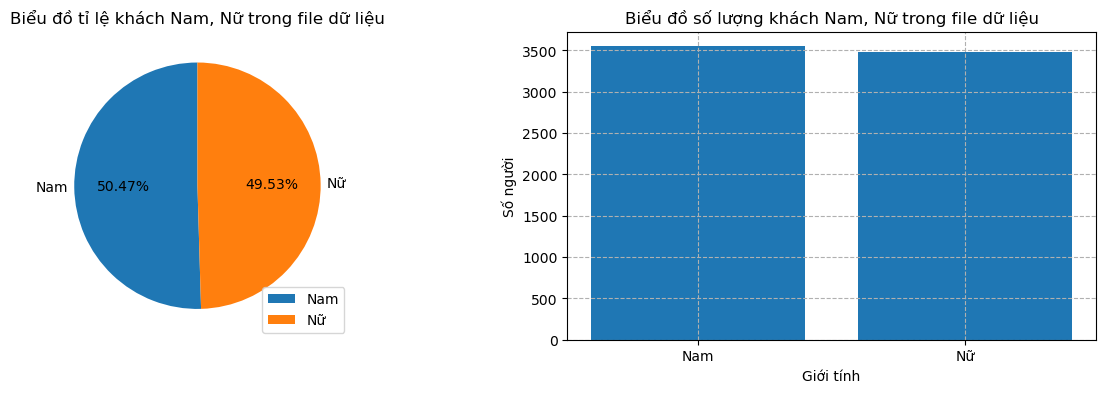

In [1006]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_Gender.values,
    labels = data_Gender.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)
plt.legend(loc=4)
plt.title("Biểu đồ tỉ lệ khách Nam, Nữ trong file dữ liệu")
plt.subplot(1,2,2)
plt.bar(
    data_Gender.index,
    data_Gender.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Giới tính')
plt.title("Biểu đồ số lượng khách Nam, Nữ trong file dữ liệu")
plt.show()

# Trực quan dữ liệu trong cột Senior Citizen(Khách hàng có là người cao tuổi hay không)

In [1008]:
data['Người già'].value_counts()

Người già
Trẻ    5890
Già    1142
Name: count, dtype: int64

In [1009]:
data_SeniorCitizen = data['Người già'].value_counts()

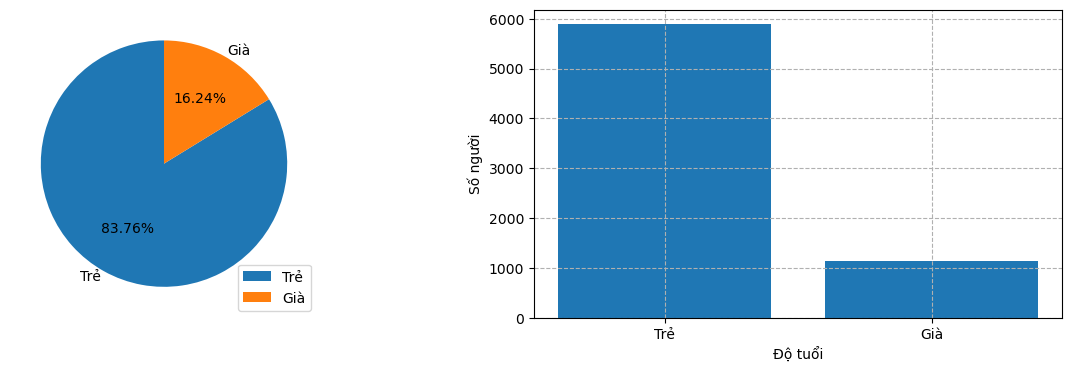

In [1010]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_SeniorCitizen.values,
    labels = data_SeniorCitizen.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)
plt.legend(loc=4)
plt.subplot(1,2,2)
plt.bar(
    data_SeniorCitizen.index,
    data_SeniorCitizen.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Độ tuổi')
plt.show()

# Trực quan dữ liệu trong cột Partner(Đối tác)

In [1012]:
data['Đối tác'].value_counts()

Đối tác
Không là đối tác    3639
Là đối tác          3393
Name: count, dtype: int64

In [1013]:
data_Partner = data['Đối tác'].value_counts()

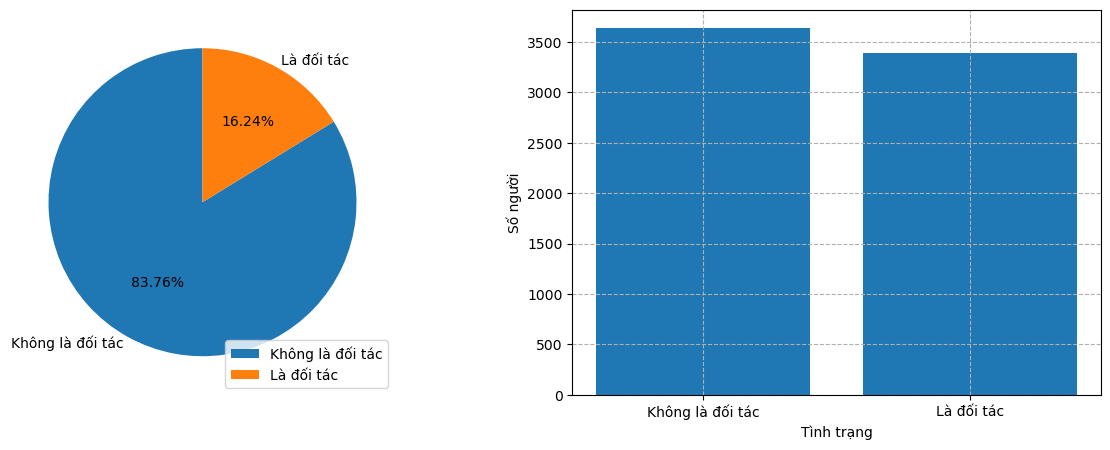

In [1014]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_SeniorCitizen.values,
    labels = data_Partner.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)

plt.legend(loc=4)
plt.subplot(1,2,2)
plt.bar(
    data_Partner.index,
    data_Partner.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Tình trạng')
plt.show()

# Trực quan dữ liệu trong cột Tenure( Thời gian khách hàng đã sử dụng dịch vụ của công ty)

In [1016]:
data_Tenure = data['Số tháng gắn bó'].value_counts()

In [1017]:
data_Tenure.sort_index()

Số tháng gắn bó
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 72, dtype: int64

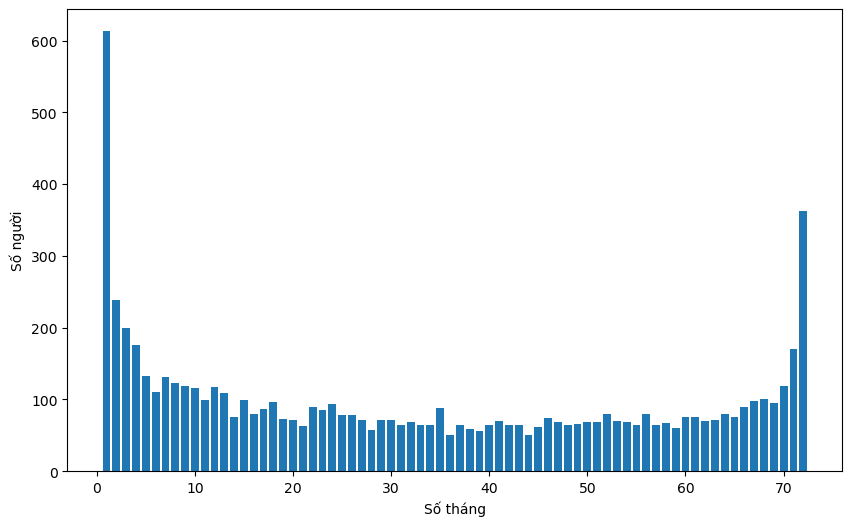

In [1018]:
plt.figure(figsize=(10,6))
plt.bar(
    data_Tenure.index,
    data_Tenure.values,
)
plt.ylabel('Số người')
plt.xlabel('Số tháng')
plt.show()

# Trực quan dữ liệu cột PhoneService(Khách hàng có sử dụng dịch vụ điện thoại hay không Yes or No)

In [1020]:
data_PhoneService = data['Dịch vụ điện thoại'].value_counts()

In [1021]:
data_PhoneService

Dịch vụ điện thoại
Sử dụng dịch vụ          6352
Không sử dụng dịch vụ     680
Name: count, dtype: int64

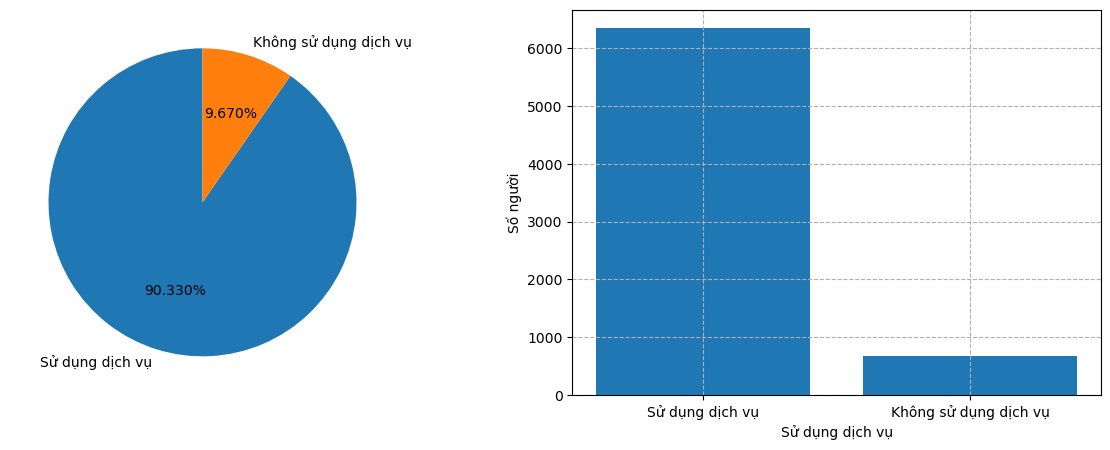

In [1022]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_PhoneService.values,
    labels = data_PhoneService.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)

plt.subplot(1,2,2)
plt.bar(
    data_PhoneService.index,
    data_PhoneService.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Sử dụng dịch vụ')
plt.show()

# Trực quan dữ liệu trong cột MultipleLines( Khách hàng có sử dụng nhiều đường dây hay không)

In [1024]:
data_MultipleLines = data['Đa luồng'].value_counts()

In [1025]:
data_MultipleLines

Đa luồng
Không sử dụng dịch vụ               3385
Sử dụng dịch vụ                     2967
Không sử dụng dịch vụ điện thoại     680
Name: count, dtype: int64

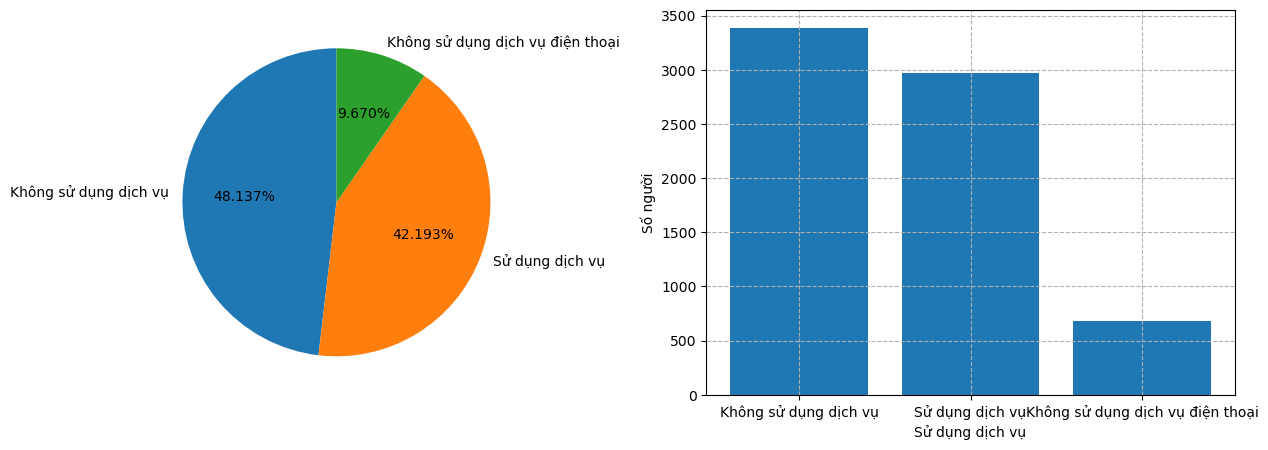

In [1026]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_MultipleLines.values,
    labels = data_MultipleLines.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)

plt.subplot(1,2,2)
plt.bar(
    data_MultipleLines.index,
    data_MultipleLines.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Sử dụng dịch vụ')
plt.show()

# Trực quan các cột liên quan đến dịch vụ Online(InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSuppor, StreamingTV)'

In [1028]:
labels[7:14]

Index(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract'],
      dtype='object')

In [1029]:
for i in labels[7:14]:
    temp = data[i].value_counts()
    print(i)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.pie(
        temp.values,
        labels = temp.index,
        autopct='%.3f%%',
        startangle=90,
        labeldistance=1.09
    )
    plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng dịch vụ')
    plt.subplot(1,2,2)
    plt.bar(
        temp.index,
        temp.values,
    )
    plt.grid(ls='--')
    plt.ylabel('Số người')
    plt.title('Biểu đồ số lượng người sử dụng dịch vụ')
    plt.show()

KeyError: 'OnlineSecurity'

# Trực quan dữ liệu trong cột Contract(Thời hạn hợp đồng của khách hàng)

In [ ]:
data_Contract = data['Loại hợp đồng'].value_counts()

In [ ]:
data_Contract

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_Contract.values,
    labels=data_Contract.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng dịch vụ')
plt.subplot(1,2,2)
plt.subplot(1,2,2)
plt.bar(
    data_Contract.index,
    data_Contract.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Thời gian hợp đồng')
plt.title('Biểu đồ số lượng người sử dụng dịch vụ')
plt.show()

# Trực quan hóa dữ liệu cột PaperlessBilling(sử dụng hóa đơn điện tử)

In [ ]:
data_PaperlessBilling = data['Thanh toán điện tử'].value_counts();
data_PaperlessBilling

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_PaperlessBilling.values,
    labels = data_PaperlessBilling.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng dịch vụ')
plt.subplot(1,2,2)
plt.bar(
    data_PaperlessBilling.index,
    data_PaperlessBilling.values,
)
plt.grid(ls='--')
plt.title('Biểu đồ số lượng người sử dụng dịch vụ')
plt.ylabel('Số người')
plt.show()

# Trực quan hóa dữ liệu cột PaymenMethod(Phương thức thanh toán của khách hàng)

In [ ]:
data_PaymenMethod = data['Phương thức thanh toán'].value_counts()

In [ ]:
data_PaymenMethod

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_PaymenMethod.values,
    labels = data_PaymenMethod.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng pttt')
plt.subplot(1,2,2)
plt.bar(
    data_PaymenMethod.index,
    data_PaymenMethod.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
# plt.xlabel('Phương thức thanh toán')
plt.xticks(rotation = 30)
plt.show()

In [ ]:
data_MonthlyCharges = data['Phí hàng tháng'].value_counts()
data['Phí hàng tháng'].describe()

In [ ]:
plt.title('Biểu đồ thể hiện số tiền mà khách hàng trả mỗi tháng')
plt.bar(
    data_MonthlyCharges.index,
    data_MonthlyCharges.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xticks(rotation = 30)
plt.show()